In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
trainer=pd.read_csv('train.csv')
trainer.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
trainer.drop(['User_ID','Product_ID'],axis=1,inplace=True)
trainer.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
gender=pd.get_dummies(trainer['Gender'],drop_first=True)

In [5]:
trainer.drop('Gender',axis=1,inplace=True)

In [6]:
trainer=pd.concat([trainer,gender],axis=1)

In [7]:
trainer.head()

,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M
0,0-17,10,A,2,0,3,NaN,NaN,8370,0
1,0-17,10,A,2,0,1,6.0,14.0,15200,0
2,0-17,10,A,2,0,12,NaN,NaN,1422,0
3,0-17,10,A,2,0,12,14.0,NaN,1057,0
4,55+,16,C,4+,0,8,NaN,NaN,7969,1


In [8]:
def categorize_age(age):
    if age == '0-17':
        return 1
    elif age == '18-25':
        return 2
    elif age == '26-35':
        return 3
    elif age == '36-45':
        return 4
    elif age == '46-50':
        return 5
    elif age == '51-55':
        return 6
    elif age == '55+':
        return 7

In [9]:
trainer['age_categ']=trainer['Age'].apply(lambda x: categorize_age(x))

In [10]:
trainer.drop('Age',axis=1,inplace=True)

In [11]:
trainer.head()

,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,age_categ
0,10,A,2,0,3,NaN,NaN,8370,0,1
1,10,A,2,0,1,6.0,14.0,15200,0,1
2,10,A,2,0,12,NaN,NaN,1422,0,1
3,10,A,2,0,12,14.0,NaN,1057,0,1
4,16,C,4+,0,8,NaN,NaN,7969,1,7


In [12]:
city=pd.get_dummies(trainer['City_Category'],drop_first=False)
trainer.drop('City_Category',axis=1,inplace=True)
trainer=pd.concat([trainer,city],axis=1)

In [13]:
trainer.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,age_categ,A,B,C
0,10,2,0,3,NaN,NaN,8370,0,1,1,0,0
1,10,2,0,1,6.0,14.0,15200,0,1,1,0,0
2,10,2,0,12,NaN,NaN,1422,0,1,1,0,0
3,10,2,0,12,14.0,NaN,1057,0,1,1,0,0
4,16,4+,0,8,NaN,NaN,7969,1,7,0,0,1


In [14]:
def city_years(years):
    if years=='4+':
        return 4
    return years

In [15]:
trainer['city_years']=trainer['Stay_In_Current_City_Years'].apply(lambda x: city_years(x))

In [16]:
trainer.drop('Stay_In_Current_City_Years',axis=1,inplace=True)

In [17]:
trainer.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,age_categ,A,B,C,city_years
0,10,0,3,NaN,NaN,8370,0,1,1,0,0,2
1,10,0,1,6.0,14.0,15200,0,1,1,0,0,2
2,10,0,12,NaN,NaN,1422,0,1,1,0,0,2
3,10,0,12,14.0,NaN,1057,0,1,1,0,0,2
4,16,0,8,NaN,NaN,7969,1,7,0,0,1,4


In [18]:
trainer.fillna(0,inplace=True)

In [19]:
trainer.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,age_categ,A,B,C,city_years
0,10,0,3,0.0,0.0,8370,0,1,1,0,0,2
1,10,0,1,6.0,14.0,15200,0,1,1,0,0,2
2,10,0,12,0.0,0.0,1422,0,1,1,0,0,2
3,10,0,12,14.0,0.0,1057,0,1,1,0,0,2
4,16,0,8,0.0,0.0,7969,1,7,0,0,1,4


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc=StandardScaler()

In [22]:
trainer.shape

(550068, 12)

In [24]:
cols=trainer.columns.tolist()

In [25]:
cols

['Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase',
 'M',
 'age_categ',
 'A',
 'B',
 'C',
 'city_years']

In [27]:
trainer = trainer[['Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'city_years',
 'M',
 'age_categ',
 'A',
 'B',
 'C',
 'Purchase']]

In [28]:
trainer.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,city_years,M,age_categ,A,B,C,Purchase
0,10,0,3,0.0,0.0,2,0,1,1,0,0,8370
1,10,0,1,6.0,14.0,2,0,1,1,0,0,15200
2,10,0,12,0.0,0.0,2,0,1,1,0,0,1422
3,10,0,12,14.0,0.0,2,0,1,1,0,0,1057
4,16,0,8,0.0,0.0,4,1,7,0,0,1,7969


In [35]:
trainee=trainer.drop('Purchase',axis=1)

In [36]:
trainee.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,city_years,M,age_categ,A,B,C
0,10,0,3,0.0,0.0,2,0,1,1,0,0
1,10,0,1,6.0,14.0,2,0,1,1,0,0
2,10,0,12,0.0,0.0,2,0,1,1,0,0
3,10,0,12,14.0,0.0,2,0,1,1,0,0
4,16,0,8,0.0,0.0,4,1,7,0,0,1


In [37]:
traineee=sc.fit_transform(trainee)

In [40]:
trainee=pd.DataFrame(traineee,columns=trainee.columns)

In [41]:
trainee.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,city_years,M,age_categ,A,B,C
0,0.294864,-0.833018,-0.610809,-1.083654,-0.614641,0.109801,-1.746513,-1.844248,1.650370,-0.851422,-0.672143
1,0.294864,-0.833018,-1.118912,-0.118323,1.625106,0.109801,-1.746513,-1.844248,1.650370,-0.851422,-0.672143
2,0.294864,-0.833018,1.675656,-1.083654,-0.614641,0.109801,-1.746513,-1.844248,1.650370,-0.851422,-0.672143
3,0.294864,-0.833018,1.675656,1.168785,-0.614641,0.109801,-1.746513,-1.844248,1.650370,-0.851422,-0.672143
4,1.214734,-0.833018,0.659449,-1.083654,-0.614641,1.660861,0.572570,2.588277,-0.605925,-0.851422,1.487778


In [42]:
tester=pd.read_csv('test.csv')
tester.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [43]:
tester.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [44]:
tester.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,M,46-50,7,B,2,1,1,11.0,NaN
1,M,26-35,17,C,0,0,3,5.0,NaN
2,F,36-45,1,B,4+,1,5,14.0,NaN
3,F,36-45,1,B,4+,1,4,9.0,NaN
4,F,26-35,1,C,1,0,4,5.0,12.0


In [45]:
gender=pd.get_dummies(tester['Gender'],drop_first=True)

In [46]:
tester.drop('Gender',axis=1,inplace=True)

In [47]:
tester=pd.concat([tester,gender],axis=1)

In [48]:
tester.head()

,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,M
0,46-50,7,B,2,1,1,11.0,NaN,1
1,26-35,17,C,0,0,3,5.0,NaN,1
2,36-45,1,B,4+,1,5,14.0,NaN,0
3,36-45,1,B,4+,1,4,9.0,NaN,0
4,26-35,1,C,1,0,4,5.0,12.0,0


In [50]:
tester['age_categ']=tester['Age'].apply(lambda x: categorize_age(x))

In [51]:
tester.drop('Age',axis=1,inplace=True)

In [52]:
tester.head()

,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,M,age_categ
0,7,B,2,1,1,11.0,NaN,1,5
1,17,C,0,0,3,5.0,NaN,1,3
2,1,B,4+,1,5,14.0,NaN,0,4
3,1,B,4+,1,4,9.0,NaN,0,4
4,1,C,1,0,4,5.0,12.0,0,3


In [53]:
city=pd.get_dummies(tester['City_Category'],drop_first=False)
tester.drop('City_Category',axis=1,inplace=True)
tester=pd.concat([tester,city],axis=1)

In [54]:
tester.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,M,age_categ,A,B,C
0,7,2,1,1,11.0,NaN,1,5,0,1,0
1,17,0,0,3,5.0,NaN,1,3,0,0,1
2,1,4+,1,5,14.0,NaN,0,4,0,1,0
3,1,4+,1,4,9.0,NaN,0,4,0,1,0
4,1,1,0,4,5.0,12.0,0,3,0,0,1


In [56]:
tester['city_years']=tester['Stay_In_Current_City_Years'].apply(lambda x: city_years(x))

In [57]:
tester.drop('Stay_In_Current_City_Years',axis=1,inplace=True)

In [58]:
tester.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,M,age_categ,A,B,C,city_years
0,7,1,1,11.0,NaN,1,5,0,1,0,2
1,17,0,3,5.0,NaN,1,3,0,0,1,0
2,1,1,5,14.0,NaN,0,4,0,1,0,4
3,1,1,4,9.0,NaN,0,4,0,1,0,4
4,1,0,4,5.0,12.0,0,3,0,0,1,1


In [59]:
tester.fillna(0,inplace=True)

In [60]:
tester.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,M,age_categ,A,B,C,city_years
0,7,1,1,11.0,0.0,1,5,0,1,0,2
1,17,0,3,5.0,0.0,1,3,0,0,1,0
2,1,1,5,14.0,0.0,0,4,0,1,0,4
3,1,1,4,9.0,0.0,0,4,0,1,0,4
4,1,0,4,5.0,12.0,0,3,0,0,1,1


In [64]:
sct=StandardScaler()

In [65]:
testeee=sct.fit_transform(tester)

In [68]:
testee=pd.DataFrame(testeee,columns=tester.columns)

In [69]:
testee.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,M,age_categ,A,B,C,city_years
0,-0.166445,1.199419,-1.144571,0.675619,-0.615789,0.573575,1.112316,-0.604547,1.170460,-0.670906,0.110432
1,1.367031,-0.833737,-0.609292,-0.289376,-0.615789,0.573575,-0.368480,-0.604547,-0.854365,1.490522,-1.443264
2,-1.086530,1.199419,-0.074014,1.158116,-0.615789,-1.743450,0.371918,-0.604547,1.170460,-0.670906,1.664128
3,-1.086530,1.199419,-0.341653,0.353954,-0.615789,-1.743450,0.371918,-0.604547,1.170460,-0.670906,1.664128
4,-1.086530,-0.833737,-0.341653,-0.289376,1.302180,-1.743450,-0.368480,-0.604547,-0.854365,1.490522,-0.666416


In [70]:
target='Purchase'
predictors=trainee.columns

In [83]:
predictors

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'city_years', 'M',
       'age_categ', 'A', 'B', 'C'],
      dtype='object')

In [72]:
traineee=pd.concat([trainee,trainer['Purchase']],axis=1)

In [73]:
traineee.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,city_years,M,age_categ,A,B,C,Purchase
0,0.294864,-0.833018,-0.610809,-1.083654,-0.614641,0.109801,-1.746513,-1.844248,1.650370,-0.851422,-0.672143,8370
1,0.294864,-0.833018,-1.118912,-0.118323,1.625106,0.109801,-1.746513,-1.844248,1.650370,-0.851422,-0.672143,15200
2,0.294864,-0.833018,1.675656,-1.083654,-0.614641,0.109801,-1.746513,-1.844248,1.650370,-0.851422,-0.672143,1422
3,0.294864,-0.833018,1.675656,1.168785,-0.614641,0.109801,-1.746513,-1.844248,1.650370,-0.851422,-0.672143,1057
4,1.214734,-0.833018,0.659449,-1.083654,-0.614641,1.660861,0.572570,2.588277,-0.605925,-0.851422,1.487778,7969


In [74]:
from sklearn.model_selection import train_test_split

In [78]:
traineee_train,traineee_test,purchase_train,purchase_test=train_test_split(traineee.drop('Purchase',axis=1),traineee['Purchase'],test_size=0.2)

In [79]:
traineee_train.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,city_years,M,age_categ,A,B,C
504454,-1.238255,-0.833018,0.659449,-1.083654,-0.614641,1.660861,0.57257,-1.105493,-0.605925,1.174506,-0.672143
128943,1.674670,-0.833018,0.659449,0.847008,-0.614641,0.885331,0.57257,-0.366739,-0.605925,1.174506,-0.672143
164538,0.908111,-0.833018,0.659449,1.651450,-0.614641,-0.665728,0.57257,1.110769,-0.605925,-0.851422,1.487778
375489,0.908111,1.200454,-0.102705,0.686119,-0.614641,1.660861,0.57257,1.110769,-0.605925,-0.851422,1.487778
533392,1.368046,-0.833018,-0.102705,1.168785,-0.614641,0.885331,0.57257,-0.366739,-0.605925,-0.851422,1.487778


In [80]:
purchase_train.head()

504454    7916
128943    6092
164538    6168
375489    7178
533392    6953
Name: Purchase, dtype: int64

In [81]:
trained=pd.concat([traineee_train,purchase_train],axis=1)

In [82]:
trained.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,city_years,M,age_categ,A,B,C,Purchase
504454,-1.238255,-0.833018,0.659449,-1.083654,-0.614641,1.660861,0.57257,-1.105493,-0.605925,1.174506,-0.672143,7916
128943,1.674670,-0.833018,0.659449,0.847008,-0.614641,0.885331,0.57257,-0.366739,-0.605925,1.174506,-0.672143,6092
164538,0.908111,-0.833018,0.659449,1.651450,-0.614641,-0.665728,0.57257,1.110769,-0.605925,-0.851422,1.487778,6168
375489,0.908111,1.200454,-0.102705,0.686119,-0.614641,1.660861,0.57257,1.110769,-0.605925,-0.851422,1.487778,7178
533392,1.368046,-0.833018,-0.102705,1.168785,-0.614641,0.885331,0.57257,-0.366739,-0.605925,-0.851422,1.487778,6953


In [110]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        #xgtest = xgb.DMatrix(dtest[predictors].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics=('rmse'), early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Purchase'],eval_metric='rmse')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("MSE : %.8g" % metrics.mean_squared_error(dtrain['Purchase'].values, dtrain_predictions))
    print("RMSE (Train): %f" % np.sqrt(metrics.mean_squared_error(dtrain['Purchase'], dtrain_predictions)))
    
    feat_imp = pd.Series(alg.get_booster().get_score()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


Model Report
MSE : 8553714
RMSE (Train): 2924.673316


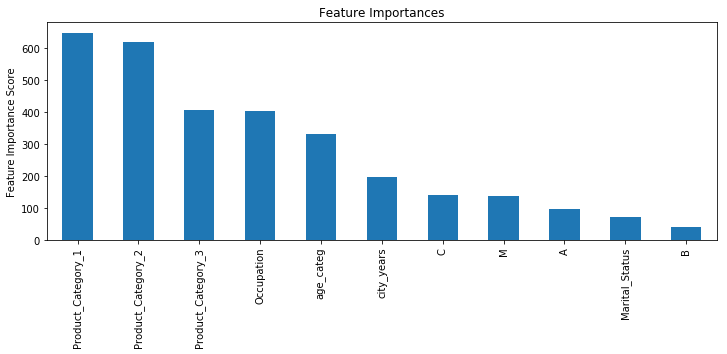

In [111]:
xgb1 = XGBRegressor(
        learning_rate =0.1,
        n_estimators=100,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'reg:linear',
        nthread=4,
        scale_pos_weight=1,
        seed=27)
modelfit(xgb1, trained, predictors)

In [114]:
param_test1 = {
 'n_estimators':np.arange(240,400,10)
}
gsearch1 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch1.fit(trained[predictors],trained[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -8413681.25777, std: 37642.16649, params: {'n_estimators': 240},
  mean: -8406610.72266, std: 36745.55822, params: {'n_estimators': 250},
  mean: -8400711.45924, std: 36723.07609, params: {'n_estimators': 260},
  mean: -8395498.98958, std: 36526.32512, params: {'n_estimators': 270},
  mean: -8388632.76178, std: 37410.44777, params: {'n_estimators': 280},
  mean: -8383878.97581, std: 36910.18988, params: {'n_estimators': 290},
  mean: -8379303.71360, std: 37024.63293, params: {'n_estimators': 300},
  mean: -8374133.22951, std: 37708.50489, params: {'n_estimators': 310},
  mean: -8369975.64018, std: 37619.86663, params: {'n_estimators': 320},
  mean: -8366670.15492, std: 37743.24593, params: {'n_estimators': 330},
  mean: -8362966.88211, std: 37785.72016, params: {'n_estimators': 340},
  mean: -8359483.89096, std: 37183.92409, params: {'n_estimators': 350},
  mean: -8355871.14321, std: 37120.04656, params: {'n_estimators': 360},
  mean: -8352563.65493, std: 37325.04794, params: {

In [115]:
param_test2 = {
 'max_depth':np.arange(3,10,2),
 'min_child_weight':np.arange(1,6,2)
}
gsearch2 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1,n_estimators=400, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test2, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch2.fit(trained[predictors],trained[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: -8620268.96446, std: 37164.18661, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: -8620268.96446, std: 37164.18661, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: -8620017.24396, std: 37397.93614, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: -8344703.09972, std: 37922.56071, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: -8343126.30941, std: 38065.88562, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: -8341944.71153, std: 38514.45148, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: -8174696.03182, std: 44779.39754, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: -8176326.55826, std: 40818.44851, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: -8177143.24064, std: 45605.04309, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: -8188966.82928, std: 48395.69618, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: -8186955.46179, std: 40774.23623, params: {'max_depth': 9, 'min_child_weight': 3},

In [116]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1,n_estimators=400, max_depth=7,
 min_child_weight=1, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test3, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch3.fit(trained[predictors],trained[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: -8174696.03182, std: 44779.39754, params: {'gamma': 0.0},
  mean: -8174696.03182, std: 44779.39754, params: {'gamma': 0.1},
  mean: -8174696.03182, std: 44779.39754, params: {'gamma': 0.2},
  mean: -8174696.03182, std: 44779.39754, params: {'gamma': 0.3},
  mean: -8174696.03182, std: 44779.39754, params: {'gamma': 0.4}],
 {'gamma': 0.0},
 -8174696.031822363)


Model Report
MSE : 7779728.8
RMSE (Train): 2789.216526


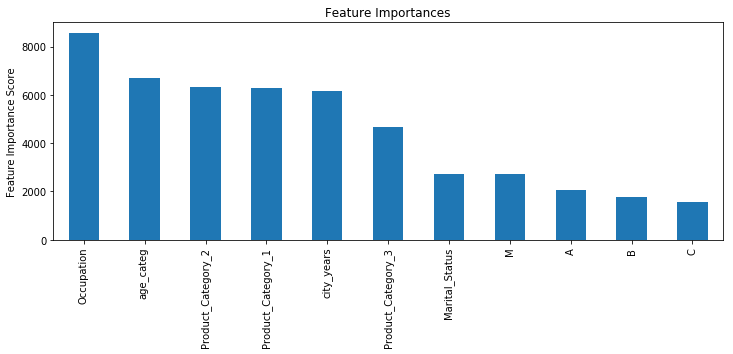

In [117]:
xgb2 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=400,
 max_depth=7,
 min_child_weight=1,
 gamma=0.0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:linear',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, trained, predictors)

In [118]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1,n_estimators=400, max_depth=7,
 min_child_weight=1,gamma=0.0, objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test4, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch4.fit(trained[predictors],trained[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: -8213856.17116, std: 46898.81662, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: -8208151.34660, std: 43679.97883, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: -8204309.08087, std: 43072.55934, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: -8193925.53867, std: 43452.54898, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: -8203642.07661, std: 44457.61019, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: -8190015.78057, std: 46270.93416, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: -8176002.39946, std: 41122.20398, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: -8169581.76857, std: 39919.34346, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: -8203036.43379, std: 40491.09391, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: -8188710.67242, std: 37324.41037, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: -8174696.03182, std: 44779.39754, params: 


Model Report
MSE : 7721419.5
RMSE (Train): 2778.744233


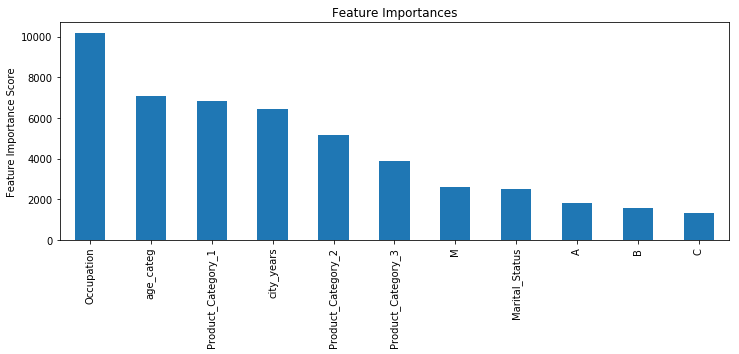

In [119]:
xgb3 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=400,
 max_depth=7,
 min_child_weight=1,
 gamma=0.0,
 subsample=1,
 colsample_bytree=1,
 objective= 'reg:linear',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3, trained, predictors)

In [128]:
param_test4 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch4 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1,n_estimators=400,subsample=1,
 colsample_bytree=1, max_depth=7,min_child_weight=1,gamma=0.0, objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test4, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch4.fit(trained[predictors],trained[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: -8139462.21568, std: 47672.93049, params: {'reg_alpha': 1e-05},
  mean: -8141952.71889, std: 44217.21182, params: {'reg_alpha': 0.01},
  mean: -8137015.00566, std: 43421.81968, params: {'reg_alpha': 0.1},
  mean: -8133418.15545, std: 44937.75832, params: {'reg_alpha': 1},
  mean: -8135665.08700, std: 44867.16199, params: {'reg_alpha': 100}],
 {'reg_alpha': 1},
 -8133418.155450949)

In [129]:
param_test5 = {
 'reg_alpha':np.arange(0.8,1.3,0.05)
}
gsearch5 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1,n_estimators=400,subsample=1,
 colsample_bytree=1, max_depth=7,min_child_weight=1,gamma=0.0, objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test5, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch5.fit(trained[predictors],trained[target])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: -8135244.28894, std: 46305.71304, params: {'reg_alpha': 0.80000000000000004},
  mean: -8134855.93502, std: 45973.86509, params: {'reg_alpha': 0.85000000000000009},
  mean: -8134906.00125, std: 46147.06900, params: {'reg_alpha': 0.90000000000000013},
  mean: -8134342.69599, std: 45670.19337, params: {'reg_alpha': 0.95000000000000018},
  mean: -8133418.15545, std: 44937.75832, params: {'reg_alpha': 1.0000000000000002},
  mean: -8133971.02010, std: 45094.59451, params: {'reg_alpha': 1.0500000000000003},
  mean: -8134244.95821, std: 44411.72327, params: {'reg_alpha': 1.1000000000000003},
  mean: -8136089.86173, std: 42067.09902, params: {'reg_alpha': 1.1500000000000004},
  mean: -8137792.43648, std: 41422.62792, params: {'reg_alpha': 1.2000000000000004},
  mean: -8137792.36723, std: 41422.62116, params: {'reg_alpha': 1.2500000000000004}],
 {'reg_alpha': 1.0000000000000002},
 -8133418.155450949)


Model Report
MSE : 7716702.9
RMSE (Train): 2777.895409


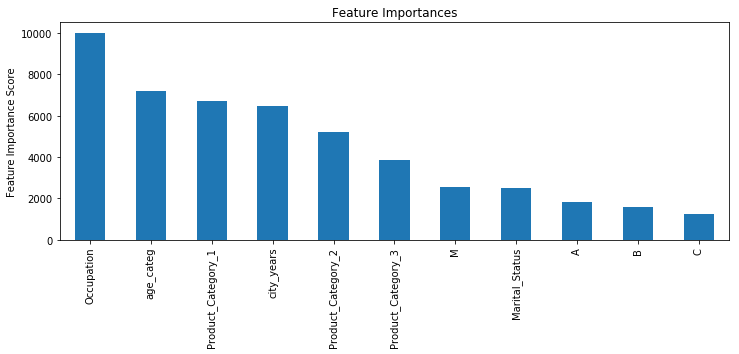

In [131]:
xgb4 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=400,
 max_depth=7,
 min_child_weight=1,
 gamma=0.0,
 subsample=1,
 reg_alpha=1,
 colsample_bytree=1,
 objective= 'reg:linear',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb4, trained, predictors)


Model Report
MSE : 7574141.7
RMSE (Train): 2752.115863


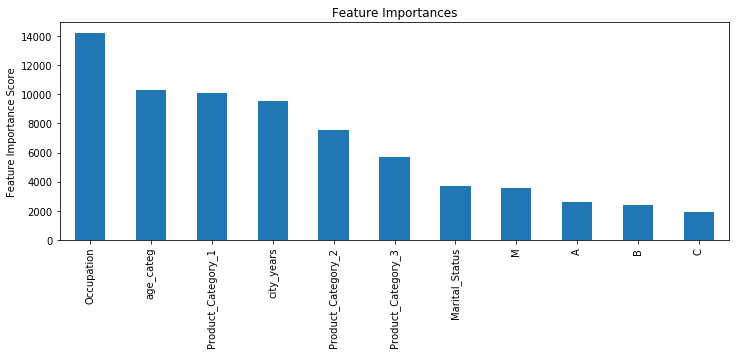

In [135]:
xgb5 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=800,
 max_depth=7,
 min_child_weight=1,
 gamma=0.0,
 subsample=1,
 reg_alpha=1,
 colsample_bytree=1,
 objective= 'reg:linear',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb5, trained, predictors)

In [137]:
param_test5 = {
 'n_estimators':np.arange(500,601,50)
}
gsearch5 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1,subsample=1,
 colsample_bytree=1, max_depth=7,min_child_weight=1,gamma=0.0, objective= 'reg:linear',reg_alpha=1, nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test5, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch5.fit(trained[predictors],trained[target])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: -8123109.58419, std: 45063.66317, params: {'n_estimators': 500},
  mean: -8123750.91447, std: 45912.61906, params: {'n_estimators': 550},
  mean: -8122550.04680, std: 43923.11434, params: {'n_estimators': 600}],
 {'n_estimators': 600},
 -8122550.046804385)


Model Report
MSE : 7573622.7
RMSE (Train): 2752.021563


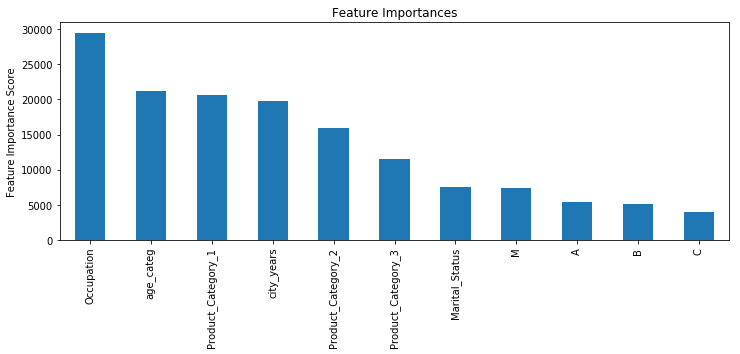

In [138]:
xgb5 = XGBRegressor(
 learning_rate =0.05,
 n_estimators=1200,
 max_depth=7,
 min_child_weight=1,
 gamma=0.0,
 subsample=1,
 reg_alpha=1,
 colsample_bytree=1,
 objective= 'reg:linear',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb5, trained, predictors)


Model Report
MSE : 7560070.6
RMSE (Train): 2749.558253


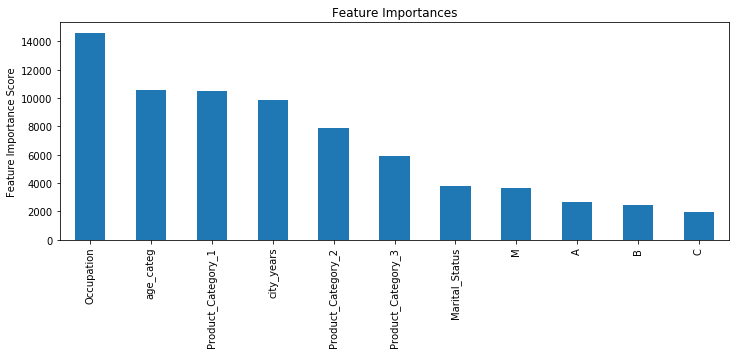

In [139]:
xgb6 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=600,
 max_depth=7,
 min_child_weight=1,
 gamma=0.0,
 subsample=1,
 reg_alpha=1,
 colsample_bytree=1,
 objective= 'reg:linear',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb6, trained, predictors)

In [140]:
xgb6.fit(traineee_train,purchase_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=600,
       n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
       reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=1)

In [142]:
traineee_test.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,city_years,M,age_categ,A,B,C
154683,-1.084943,-0.833018,-1.118912,-0.118323,1.785088,1.660861,0.57257,-0.366739,-0.605925,-0.851422,1.487778
320343,-1.238255,-0.833018,1.421604,-1.083654,-0.614641,1.660861,0.57257,0.372015,-0.605925,-0.851422,1.487778
233225,-0.471696,-0.833018,0.659449,1.490561,-0.614641,-0.665728,0.57257,-1.105493,-0.605925,1.174506,-0.672143
419416,-0.471696,-0.833018,2.691862,-1.083654,-0.614641,-0.665728,0.57257,0.372015,-0.605925,1.174506,-0.672143
451698,1.827982,1.200454,-0.102705,0.203454,1.625106,-1.441258,0.57257,0.372015,1.650370,-0.851422,-0.672143


In [143]:
predicts=xgb6.predict(traineee_test)

In [144]:
predicts

array([ 12088.80957031,   5349.54492188,   7591.49414062, ...,
         6240.59570312,   1033.87841797,  15776.25097656], dtype=float32)

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

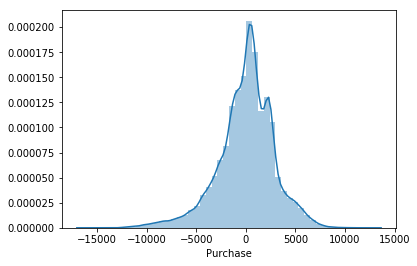

In [147]:
sns.distplot((purchase_test-predicts),bins=50);

In [148]:
print('MAE:', metrics.mean_absolute_error(purchase_test, predicts))
print('MSE:', metrics.mean_squared_error(purchase_test, predicts))
print('RMSE:', np.sqrt(metrics.mean_squared_error(purchase_test, predicts)))

MAE: 2119.58560578
MSE: 8107718.70783
RMSE: 2847.40561


In [149]:
testee.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,M,age_categ,A,B,C,city_years
0,-0.166445,1.199419,-1.144571,0.675619,-0.615789,0.573575,1.112316,-0.604547,1.170460,-0.670906,0.110432
1,1.367031,-0.833737,-0.609292,-0.289376,-0.615789,0.573575,-0.368480,-0.604547,-0.854365,1.490522,-1.443264
2,-1.086530,1.199419,-0.074014,1.158116,-0.615789,-1.743450,0.371918,-0.604547,1.170460,-0.670906,1.664128
3,-1.086530,1.199419,-0.341653,0.353954,-0.615789,-1.743450,0.371918,-0.604547,1.170460,-0.670906,1.664128
4,-1.086530,-0.833737,-0.341653,-0.289376,1.302180,-1.743450,-0.368480,-0.604547,-0.854365,1.490522,-0.666416


In [154]:
preds=xgb6.predict(testee)

In [152]:
testee=testee[['Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'city_years', 'M', 'age_categ', 'A', 'B', 'C']]

In [153]:
testee.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,city_years,M,age_categ,A,B,C
0,-0.166445,1.199419,-1.144571,0.675619,-0.615789,0.110432,0.573575,1.112316,-0.604547,1.170460,-0.670906
1,1.367031,-0.833737,-0.609292,-0.289376,-0.615789,-1.443264,0.573575,-0.368480,-0.604547,-0.854365,1.490522
2,-1.086530,1.199419,-0.074014,1.158116,-0.615789,1.664128,-1.743450,0.371918,-0.604547,1.170460,-0.670906
3,-1.086530,1.199419,-0.341653,0.353954,-0.615789,1.664128,-1.743450,0.371918,-0.604547,1.170460,-0.670906
4,-1.086530,-0.833737,-0.341653,-0.289376,1.302180,-0.666416,-1.743450,-0.368480,-0.604547,-0.854365,1.490522


In [155]:
preds

array([ 15405.50585938,  10931.08105469,   6817.03027344, ...,
        12892.15820312,  20279.78320312,   2380.31958008], dtype=float32)

In [156]:
final=pd.read_csv('test.csv')

In [157]:
final['Purchase']=preds

In [158]:
final.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,15405.505859
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,10931.081055
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,6817.030273
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,2743.303223
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,2704.230225


In [159]:
final.to_csv('resxgb.csv')


Model Report
MSE : 7559558.2
RMSE (Train): 2749.465082


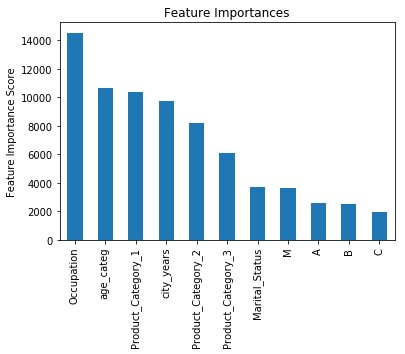

In [180]:
xgb6 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=600,
 max_depth=7,
 min_child_weight=1,
 gamma=0.0,
 subsample=1,
 reg_alpha=10,
 colsample_bytree=1,
 objective= 'reg:linear',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb6, trained, predictors)

In [181]:
xgb6.fit(traineee_train,purchase_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=600,
       n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
       reg_alpha=10, reg_lambda=1, scale_pos_weight=1, seed=27,
       silent=True, subsample=1)

In [182]:
preds1=xgb6.predict(traineee_test)

In [183]:
preds1

array([ 8677.62402344,  9214.6015625 ,  9284.52539062, ...,  9524.58203125,
        9522.56640625,  9485.29785156], dtype=float32)

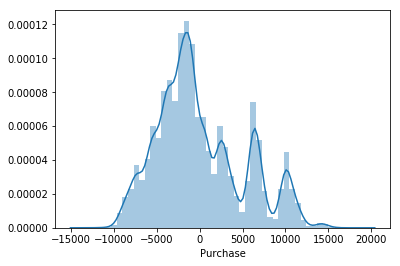

In [184]:
sns.distplot((purchase_test-preds1),bins=50);

In [185]:
traineee_train.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,city_years,M,age_categ,A,B,C
504454,-1.238255,-0.833018,0.659449,-1.083654,-0.614641,1.660861,0.57257,-1.105493,-0.605925,1.174506,-0.672143
128943,1.674670,-0.833018,0.659449,0.847008,-0.614641,0.885331,0.57257,-0.366739,-0.605925,1.174506,-0.672143
164538,0.908111,-0.833018,0.659449,1.651450,-0.614641,-0.665728,0.57257,1.110769,-0.605925,-0.851422,1.487778
375489,0.908111,1.200454,-0.102705,0.686119,-0.614641,1.660861,0.57257,1.110769,-0.605925,-0.851422,1.487778
533392,1.368046,-0.833018,-0.102705,1.168785,-0.614641,0.885331,0.57257,-0.366739,-0.605925,-0.851422,1.487778
